{'t': array([ 0. ,  0.5,  1. , ..., 48.5, 49. , 49.5], dtype=float32), 'K': array([0.09223185, 0.09223185, 0.09223185, ..., 0.11173779, 0.11173779,
       0.11173779], dtype=float32), 'V': array([0.02929738, 0.02929738, 0.02929738, ..., 0.03225088, 0.03225088,
       0.03225088], dtype=float32), 'U': array([0.23461808, 0.23461808, 0.23461808, ..., 0.17850058, 0.17850058,
       0.17850058], dtype=float32), 'true_x1': array([0.234618, 0.478151, 0.978574, ..., 0.767152, 0.744891, 0.718258],
      dtype=float32), 'true_w': array([0.029297, 0.03354 , 0.04499 , ..., 0.181497, 0.182081, 0.182155],
      dtype=float32), 'pred_x1': array([0.23988816, 0.46891832, 0.9916195 , ..., 0.76681954, 0.7417832 ,
       0.70729977], dtype=float32), 'pred_w': array([0.02703855, 0.04362302, 0.06676116, ..., 0.17047523, 0.17308557,
       0.1763739 ], dtype=float32)}
(1000000,)
max e(rr region:  0.08131175488233566 0.205130934715271 0.05020228400826454 23.5
max err 0.927060641348362
mean err 5.9685349027511

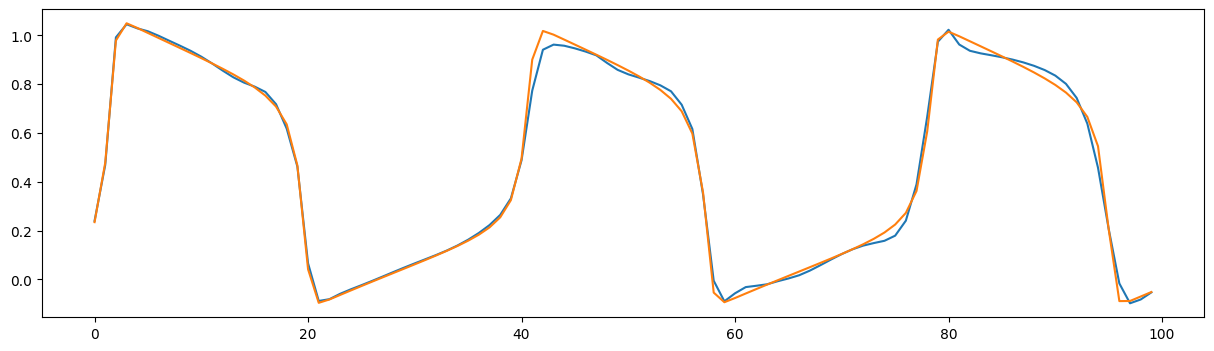

IAPP 0.11497225612401962
W0 0.031240718439221382
U0 0.5677648782730103
IAPP 0.09709439426660538
W0 0.006315427832305431
U0 0.35049504041671753
IAPP 0.10343494266271591
W0 0.018591850996017456
U0 0.256268173456192
IAPP 0.11324252188205719
W0 0.04889141768217087
U0 0.3220301568508148
IAPP 0.08604630827903748
W0 0.05427345260977745
U0 0.5242935419082642


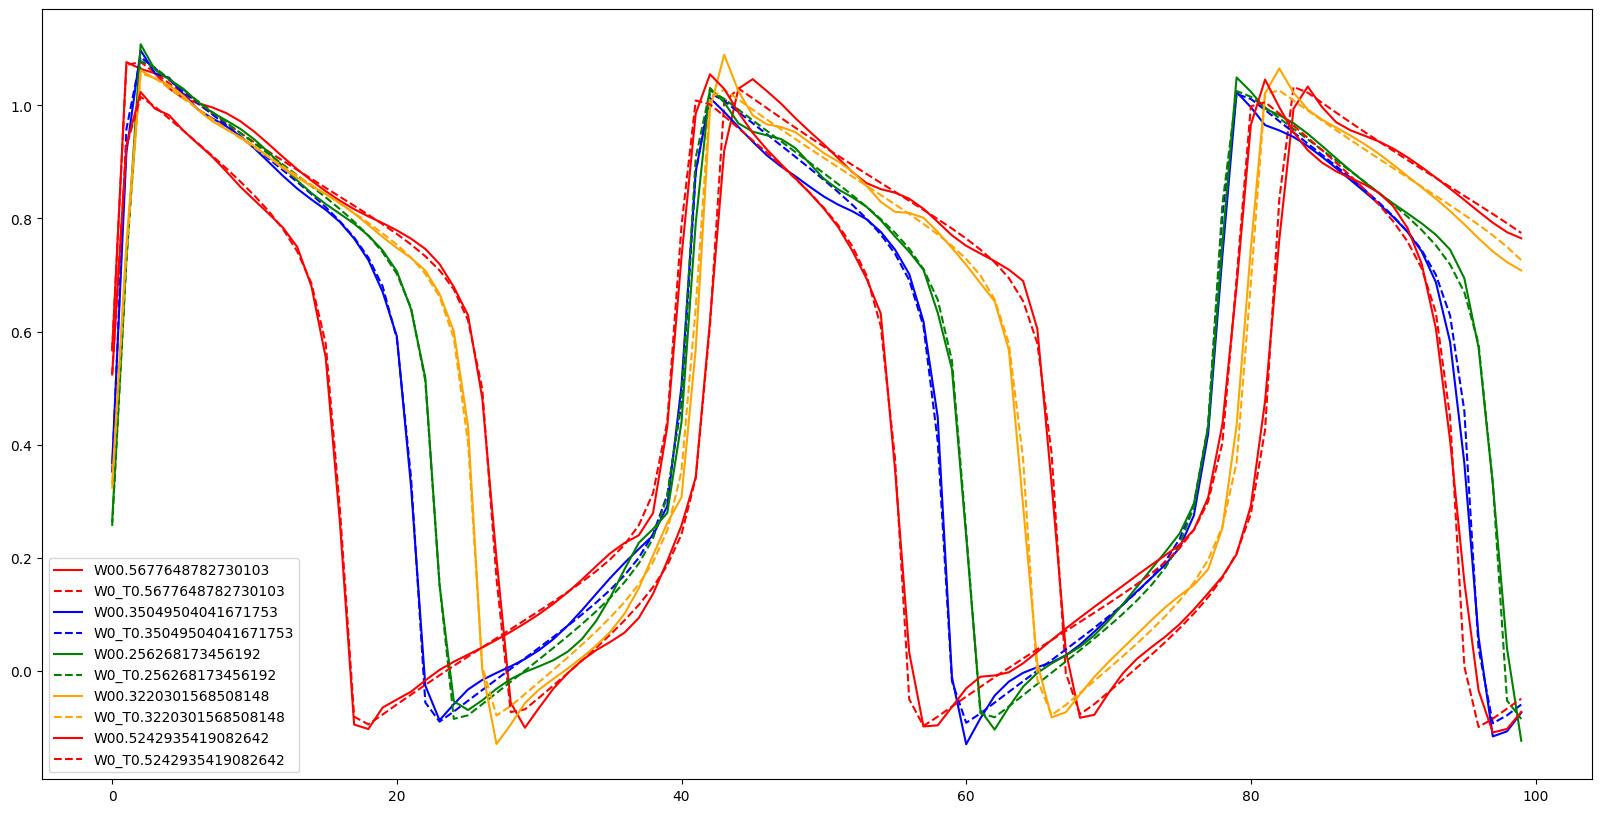

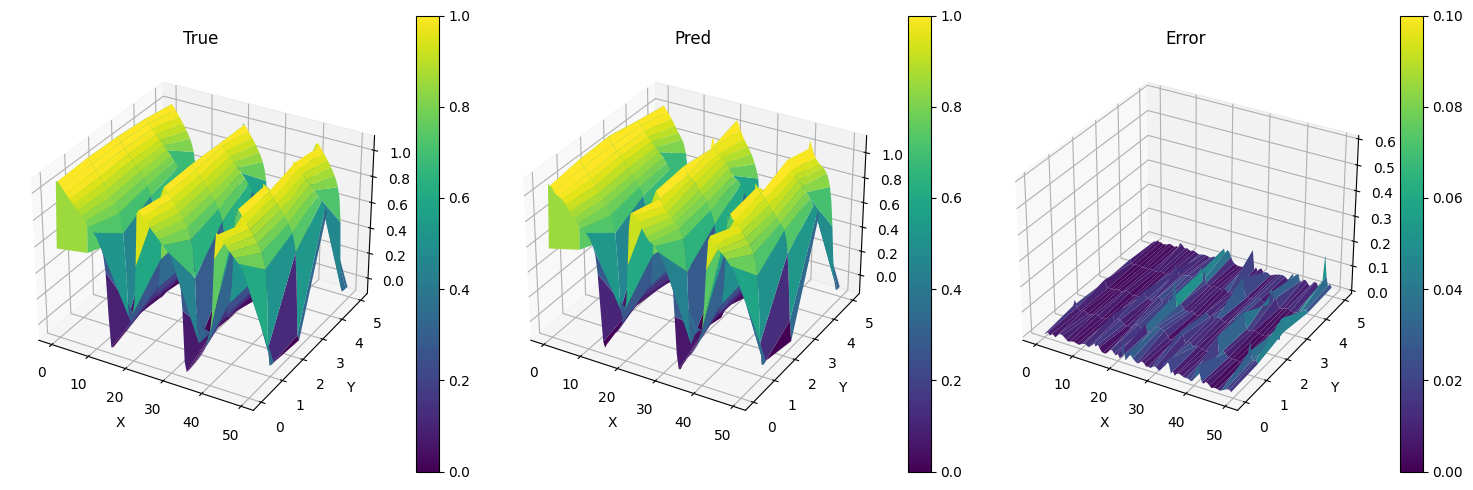

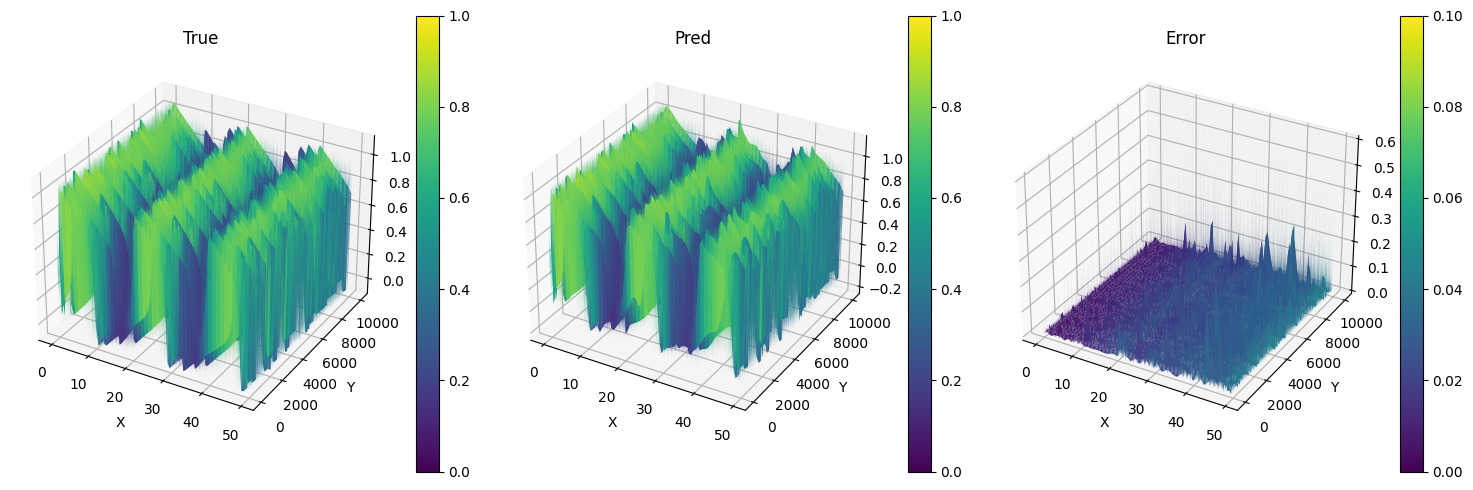

In [81]:
import numpy as np
import matplotlib.pyplot as plt

##mostra que ele cria uma cond inicial novamente para cada janela
import vtk
import matplotlib.pyplot as plt
import scipy  

import vtk
from vtk.util.numpy_support import vtk_to_numpy

import vtk
import matplotlib.pyplot as plt
import numpy as np
colors=["red","blue","green","orange","red","blue","green","yellow","orange"]
import vtk
from vtk.util.numpy_support import vtk_to_numpy
def read_vtp(path):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    data = reader.GetOutput().GetPointData()

    field_count = data.GetNumberOfArrays()
    return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}
def interpolate_2D( size, invar, *outvars):
        "Interpolate 2D outvar solutions onto a regular mesh"

        assert len(invar) == 2

        # define regular mesh to interpolate onto
        xs = [invar[k][:, 0] for k in invar]
        extent = (xs[0].min(), xs[0].max(), xs[1].min(), xs[1].max())
        xyi = np.meshgrid(
            np.linspace(extent[0], extent[1], size),
            np.linspace(extent[2], extent[3], size),
            indexing="ij",
        )

        # interpolate outvars onto mesh
        outvars_interp = []
        for outvar in outvars:
            outvar_interp = {}
            for k in outvar:
                outvar_interp[k] = scipy.interpolate.griddata(
                    (xs[0], xs[1]), outvar[k][:, 0], tuple(xyi)
                )
            outvars_interp.append(outvar_interp)

        return [extent] + outvars_interp

def all(invar, true_outvar, pred_outvar):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=pred_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=true_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=((true_outvar["x1"] -pred_outvar["x1"])**2)**0.5 ) 
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
#fig,a=plt.subplots(3, 3,sharex=True,sharey=True,figsize=(3 * 5, 3*5), dpi=100)

def call(invar, true_outvar, pred_outvar,d=0,F=plt.figure(figsize=(3 * 5, 4), dpi=100),label=""):
        extent, true_outvar, pred_outvar = interpolate_2D(
                200, invar, true_outvar, pred_outvar
            )
        ndim=2
        print(extent)

        dims = list(invar.keys())
        fs = []
        for k in pred_outvar:

            for i, (o, tag) in enumerate(
                zip(
                    [true_outvar[k], pred_outvar[k], ((true_outvar[k] - pred_outvar[k])**2)**(0.5) ],
                    ["True U", "Pred U", "Error"],
                )
            ):
                if (tag=="diff"):
                    to=o
                    to[0][0]=0
                print(i,d)
                if ndim == 1:
                    f.plot(invar[dims[0]][:, 0], o[:, 0])
                    f.xlabel(dims[0])
                elif ndim == 2:
                    f=F[i]
                    im=f.imshow(o.T, origin="lower",extent=(0,10,0,14),aspect=1)
                    
                    f.set_xlabel("T")
                    f.set_ylabel("K")
                    fig.colorbar(im,ax=f)
                    if(tag=="Error"):
                       
                        im.set_clim(0,0.1)
                    else :
                        im.set_clim(-.2,1)
               
                f.set_title(f"{tag}")
                
                ax=f
                if(i==0):
                    ax.annotate(label, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad,0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')
            #f.tight_layout()

            
def plot2(xlist,ylist,Z):

    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Filled Contours Plot')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    plt.show()
    def read_vtp(path):
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(path)
        reader.Update()
        data = reader.GetOutput().GetPointData()
        field_count = data.GetNumberOfArrays()
        return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}

def r(path):
    
    data=read_vtp(path)
    print(data)
    return data["t"],data["pred_x1"],data["K"],data["true_x1"],data["V"],data["U"],data["pred_w"],data["true_w"]
def plot(path):

    data=read_vtp(path)
    
    ks=np.unique(data["K"])
    o=find(data["K"],ks[9])
    i=find(data["V"][o],0.0)
    
    for a in range(0,len(i)):
        i[a]=i[a]+o[0]
    
  #  print(i)
   
    #print(([i]))
    t=np.unique(data["t"])
    
    plt.scatter(data['t'][i],data['true_x1'][i],"or")

    plt.plot(data['t'][i],data['pred_x1'][i],"b")

    plt.ylim(-1,1)

       
def find(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]



p=lambda s:'outputs/fhn3Ppred/window'+str(s)+'/validators/validator.vtp'
#plot('outputs/fhn2eqtwboth3C/initial_conditions/validators/validator.vtp')


t,x,k,tx,v,u,w,tw= r('outputs/fhn3Ppred/initial_conditions/validators/validator.vtp')
n_w=1
n=np.shape(x)[0]
T=np.zeros(n*n_w)
X=np.zeros(n*n_w)
K=np.zeros(n*n_w)
TX=np.zeros(n*n_w)
V=np.zeros(n*n_w)
U=np.zeros(n*n_w)
W=np.zeros(n*n_w)
TW=np.zeros(n*n_w)

T[0:n]=t
X[0:n]=x
K[0:n]=k
TX[0:n]=tx
V[0:n]=v
U[0:n]=u
W[0:n]=w
TW[0:n]=tw


for i in range(1,1):
    print(i)
    d=r(p(i))
    T[n*i:n*(i+1)]=d[0]
    X[n*i:n*(i+1)]=d[1]
    K[n*i:n*(i+1)]=d[2]
    TX[n*i:n*(i+1)]=d[3]
    V[n*i:n*(i+1)]=d[4]
    U[n*i:n*(i+1)]=d[5]
    
    W[n*i:n*(i+1)]=d[6]
    TW[n*i:n*(i+1)]=d[7]
    
    
E= ((X-TX)**2)**0.5

print(np.shape(E))
import operator

ae,m= max(enumerate(E), key=operator.itemgetter(1))
print("max e(rr region: ",K[ae],U[ae],V[ae],T[ae])
print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)

e=lambda x:np.expand_dims(x,axis=1)


nc=len(U)//len(np.unique(T))

print("a",nc)
d=0
print(np.shape(X))

pred_u= np.reshape(X, (nc,len(X)//nc))
true_u= np.reshape(TX, (nc,len(X)//nc))

ks,us,vs=np.reshape(K, (nc,len(X)//nc)),np.reshape(U, (nc,len(X)//nc)),np.reshape(V, (nc,len(X)//nc))



N=0
print("IAPP",ks[N][1])
print("W0",vs[N][1])
print("U0",us[N][1])
plt.plot(pred_u[N])
plt.plot(true_u[N])

plt.show()

u_k=np.unique(ks)
u_v=np.unique(vs)
u_u=np.unique(us)



#Ns=[i for i in range(nc) if  np.any(vs[i][10] ==u_v[8:11]) and ks[i][10]==u_k[6] and us[i][10]==u_u[2]]
Ns=[10,20,30,40,50]
plt.figure(figsize=(20, 10))
for i,N in enumerate(Ns):
    print("IAPP",ks[N][1])
    print("W0",vs[N][1])
    print("U0",us[N][1])
    plt.plot(pred_u[N],label="W0"+str(us[N][1]),color=colors[i])
    plt.plot(true_u[N],"--",label="W0_T"+str(us[N][1]),color=colors[i])

plt.legend(loc="best")
plt.show()


Ns=[10,20,30,40,50]


data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])

# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis',vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)
    if(i==2):
        ax.set_zlim(0,0.6) 
# Show the multi-plot
plt.tight_layout()
plt.show()



Ns=range(0,nc)

#Ns=range(200,250)
data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])

# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis',vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)
    if(i==2):
        ax.set_zlim(0,0.6) 
# Show the multi-plot
plt.tight_layout()
plt.show()


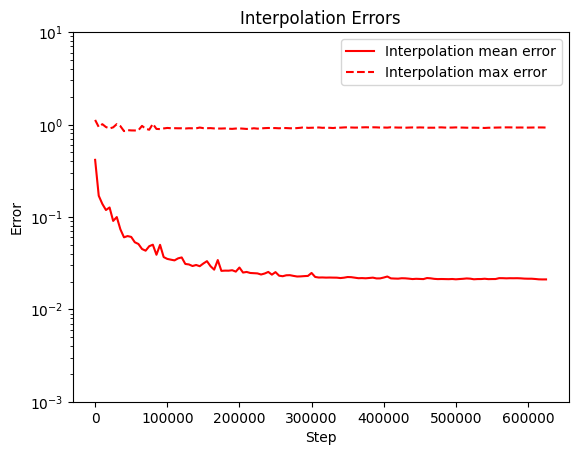

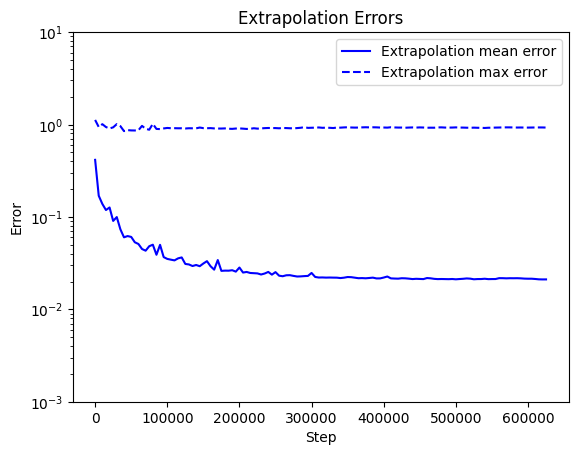

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Load CSV files
file_paths = [
    'outputs/fhn3Ppred/initial_conditions/monitors/Inter_error_mean.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Inter_error_max.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Extra_error_mean.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Extra_error_max.csv'
]

data_list = [np.loadtxt(file_path, delimiter=',', skiprows=1) for file_path in file_paths]



# Separate data into steps and errors
steps_list = [data[:, 0] for data in data_list]
errors_list = [data[:, 1] for data in data_list]

# Plot Interpolation Errors
plt.figure()
plt.semilogy(steps_list[0], errors_list[0], "r", label="Interpolation mean error")
plt.semilogy(steps_list[0], errors_list[1], "r--", label="Interpolation max error")
plt.ylim(0.001, 10)  # Set appropriate y-axis limits
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Interpolation Errors')
plt.legend(loc="best")
plt.show()

# Plot Extrapolation Errors
plt.figure()
plt.semilogy(steps_list[0], errors_list[2], "b", label="Extrapolation mean error")
plt.semilogy(steps_list[0], errors_list[3], "b--", label="Extrapolation max error")
plt.ylim(0.001, 10)  # Set appropriate y-axis limits
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Extrapolation Errors')
plt.legend(loc="best")
plt.savefig("Resultado6x3aa2")
plt.show()

NameError: name 'common' is not defined